# Bayes Study

## Lecture 2

### Part 2 Bayes Rule

#### 例1

假定你有一个地球仪代表我们的星球。你很好奇有多少表面被水覆盖，可以采取以下策略：将地球抛到空中，当你抓住它时记录下右手食指下的表面是水还是陆地。然后将地球仪再次抛向空中，重复上述步骤。

#### 这9次的结果如下(W代表水，L代表陆地)：W L W W W L W L W

#### 预设：
(1) 覆盖地球的水的真实比例是p

(2) 每次抛掷，有p的概率观测到水，有1-p的概率观测到陆地

(3) 每次观测都是相互独立的

#### 二项分布来对这个事件进行描述：
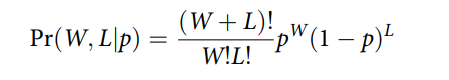

#### 问题：
假定我们每次观测到水的概率为p，观测到 W L W W W L W L W 这一事件的概率为多少？

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
p = stats.binom.pmf(6,9, 0.5) #二项分布，在9次事件中观测到6次目标，p=0.5
print(f"我们观察到这一事件的概率为{p}")

Matplotlib is building the font cache; this may take a moment.


我们观察到这一事件的概率为0.16406250000000003


#### 无数据时
我们可能认为事件发生的概率假定为均匀分布:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mrow>
      <mi>p</mi>
      <mo>&#x223C;<!-- ∼ --></mo>
      <mi>U</mi>
      <mo stretchy="false">(</mo>
      <mn>0</mn>
      <mo>,</mo>
      <mn>1</mn>
      <mo stretchy="false">)</mo>
    </mrow>
    <annotation encoding="application/x-tex">p \sim U(0,1)</annotation>
  </semantics>
</math>

#### 当开始观测时
观察到水的概率服从二项分布:
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mrow>
      <mi>W</mi>
      <mo>&#x223C;<!-- ∼ --></mo>
      <mi>B</mi>
      <mi>i</mi>
      <mi>n</mi>
      <mi>o</mi>
      <mi>m</mi>
      <mi>i</mi>
      <mi>a</mi>
      <mi>l</mi>
      <mo stretchy="false">(</mo>
      <mi>N</mi>
      <mo>,</mo>
      <mi>p</mi>
      <mo stretchy="false">)</mo>
    </mrow>
    <annotation encoding="application/x-tex">W \sim Binomial(N,p)</annotation>
  </semantics>
</math>

#### 每一次事件发生，都可能会改变我们都对概率认知:
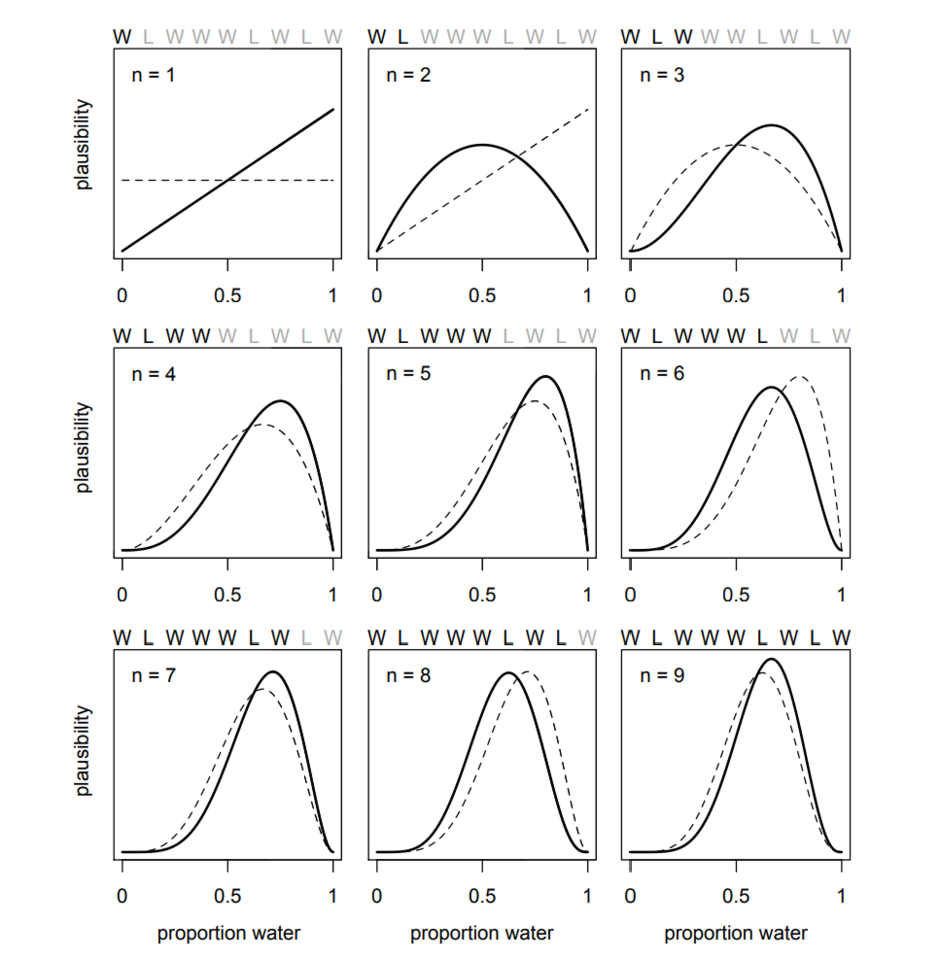



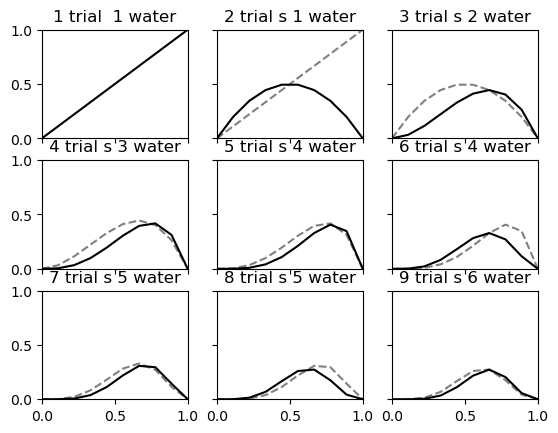

In [4]:
from turtle import color

_, axes = plt.subplots(3,3, sharey=True, sharex=True)
axes = np.ravel(axes)

n_trials = [1, 2, 3, 4, 5, 6, 7, 8, 9] #每一轮累计试次数
success = [1, 1, 2, 3, 4, 4, 5, 5, 6] #每一轮累计成功数
data = zip(n_trials, success) #两个数组合并为二维形式


x = np.linspace(0,1,10) #将0-1均匀分为9段

for idx,(n,w) in enumerate(data):
    s_n = ("s" if (n > 1) else "")

    if idx == 0:
        y = stats.uniform.pdf(x,0,1) #均匀分布
        axes[idx].plot(x, y, color='grey', ls = '--')
        axes[idx].set_ylim(0, 1)
        axes[idx].set_xlim(0, 1)
    else:
        axes[idx].plot(x, y_last, color='grey', ls = '--')
        axes[idx].set_ylim(0, 1)
        axes[idx].set_xlim(0, 1)

    y = stats.binom.pmf(w,n,x) #二项分布

    y_last  = y

    axes[idx].plot(x, y ,color = 'black')
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlim(0, 1)
    axes[idx].set_title(f"{n} trial {s_n} {w} water")

#### 贝叶斯法则

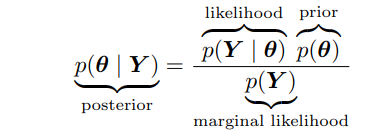


#### 不同的先验和似然会产生不同的后验分布
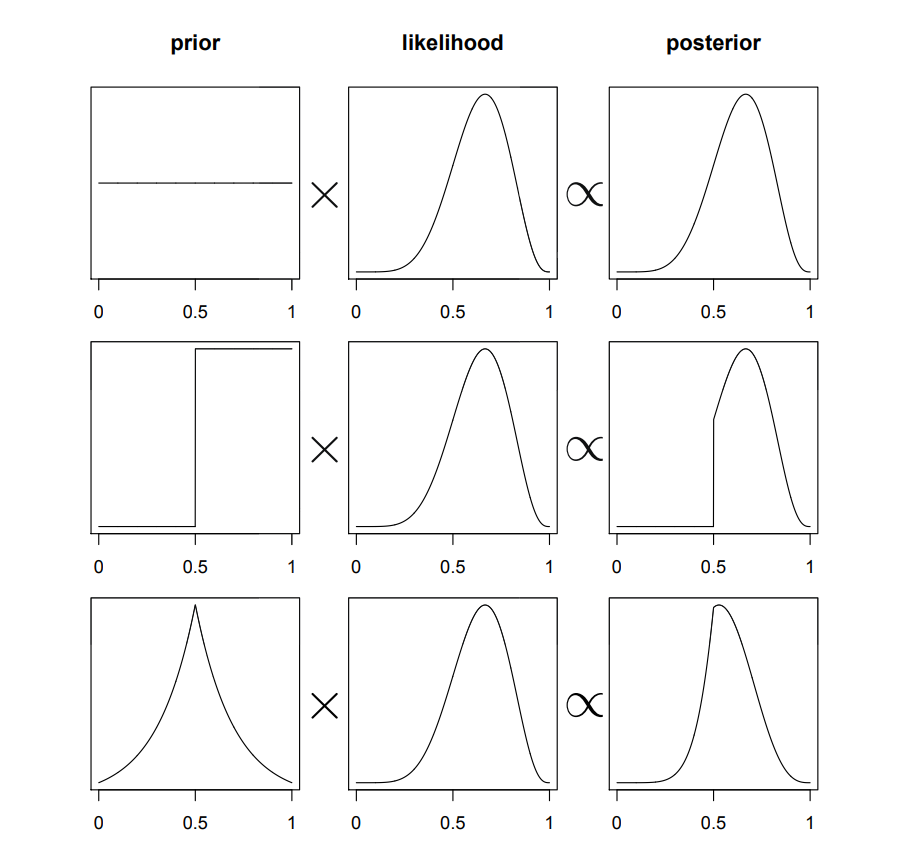


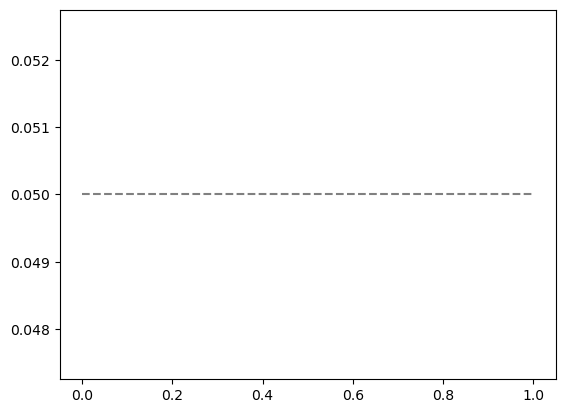

In [5]:
x = np.linspace(0,1,20)

prior = stats.uniform.pdf(x,0,1)/np.sum(stats.uniform.pdf(x,0,1))

plt.plot(x, prior , color = 'grey',ls = '--')

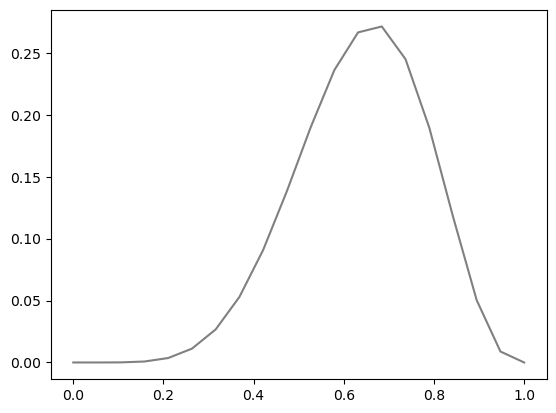

In [6]:
likelihood = stats.binom.pmf(6,9, x)

plt.plot(x, likelihood , color = 'grey')

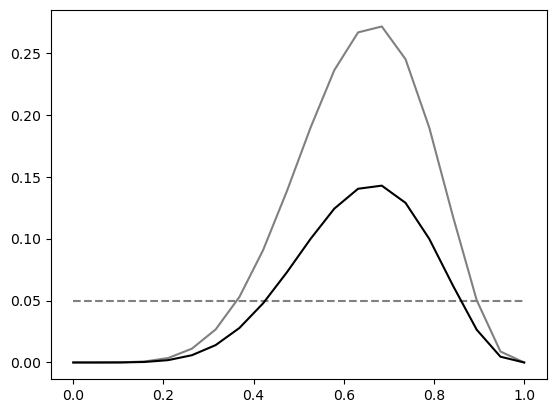

In [7]:
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--')
plt.plot(x, likelihood , color = 'grey')
plt.plot(x, posterior , color = 'black')

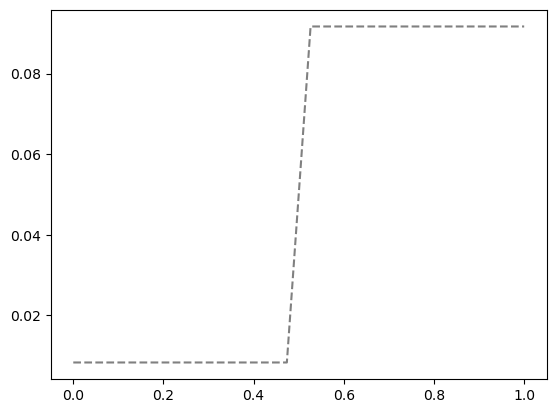

In [8]:
x = np.linspace(0,1,20)

prior = np.concatenate([np.repeat(0.1,10),np.repeat(1.1,10)])/np.sum(np.concatenate([np.repeat(0.1,10),np.repeat(1.1,10)]))

plt.plot(x, prior , color = 'grey',ls = '--')

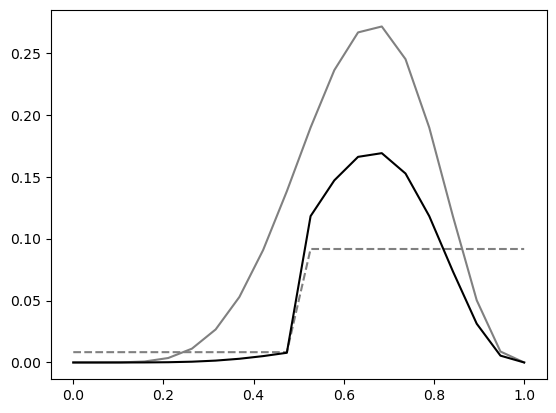

In [9]:
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--')
plt.plot(x, likelihood , color = 'grey')
plt.plot(x, posterior , color = 'black')

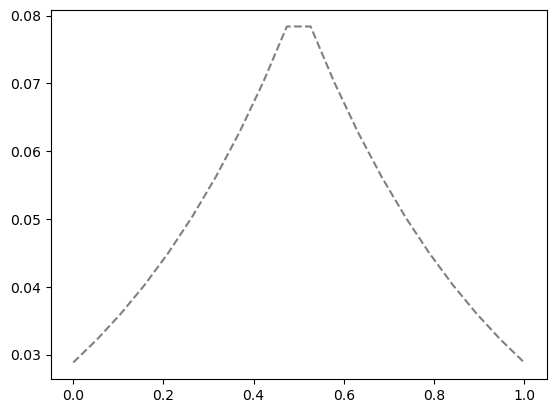

In [10]:
x = np.linspace(0,1,20)

prior = np.concatenate([np.exp(np.linspace(0,1,10)),np.exp(np.linspace(1,0,10))])/np.sum(np.concatenate([np.exp(np.linspace(0,1,10)),np.exp(np.linspace(1,0,10))]))

plt.plot(x, prior , color = 'grey',ls = '--')

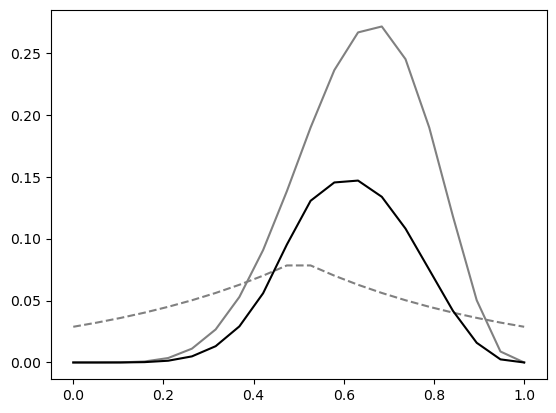

In [11]:
unstd_posterior = prior*likelihood
posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(x, prior , color = 'grey',ls = '--')
plt.plot(x, likelihood , color = 'grey')
plt.plot(x, posterior , color = 'black')

### Part 3 贝叶斯学派与频率学派的对比

#### 频率学派如何看待这个世界？

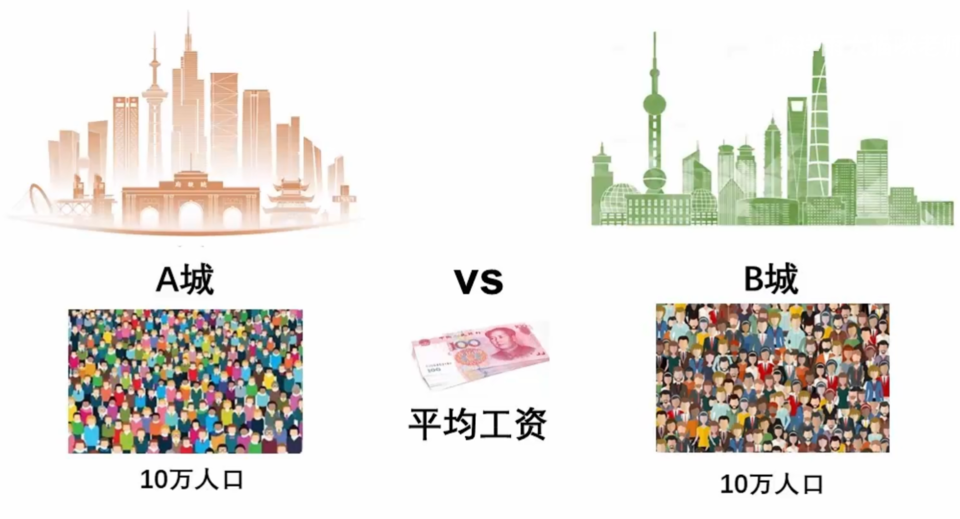

我们假设存在两个城市，其中A城市的平均工资为6000元每月，B城市的平均工资为6500元每月。

然后，由于两个城市的人口太多，通过两个城市中所有人的工资去计算平均工作是费时费力的。其次，对于‘地球中大陆的占比’的问题，记录所有的陆地和海洋是不太可能的。

因此，统计学家选择 抽样 的方式通过 样本 来估计两个城市 总体 的均值。

值得注意的是：

1. 这个例子中两个总体均值的差异(工资差异)是固定的，即世界的真相是固定的。然而在真实的“大世界”中，比如人们幸福感上的差异，差异的“真相”是我们想要探索的，未知的。

2. 通过抽样的方式去估计总体会存在噪音或者偏差。

3. 频率学派认为概率是噪音的体现。结合前两点，两个城市的差异是固定的，而抽样带来了误差，因此概率代表的是样本能代表总体的概率。

4. 噪音受到抽样样本大小和工资方差变异的影响。另一个常见的问题是抽样样本的概率分布与样本大小和总体方差有关，如下图。

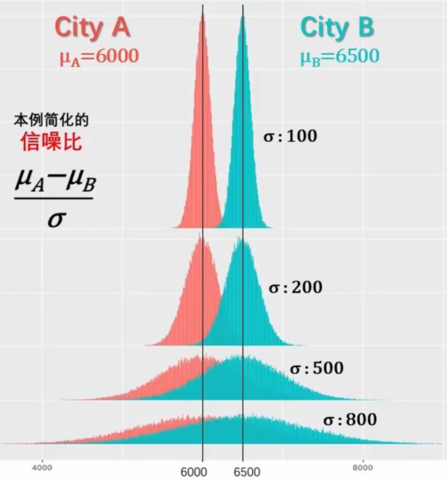

##### 最后，频率学派如何推断出两个总体之间的差异？

1. 由于两个总体间的差异是固定的，因此，判断差异是否显著与噪声大小有关，即信噪比。

2. 频率学派通过零假设的显著性检验(Null hypothesis significant test, NHST)来判断这个显著性。即通过拒绝极端值的方式避免噪音的影响。在数学上通过计算置信区间(confidence interval)和p值来帮助推断过程。


#### 贝叶斯学派如何看待这个世界？

##### 贝叶斯学派的出现与兴趣在于频率学派所存在的问题。 主要体现在2个方面：

1. 世界的真相(差异)可能不是固定的。比如对于复杂世界现象背后的机制是难以确定的。

2. 通过抽样样本去替代总体容易出现偏差。比如由于抽到极端值从而错误的估计总体。此外，相关的问题还有typeⅠ错误，统计检验力，p-hacking等。

##### 贝叶斯学派提供了另一种角度去解释上述的问题。

1. 首先，贝叶斯学派认为世界的真相不是固定不变的，并且他们通过概率去描述这种变化。比如，两个城市平均工资的差异可能受到各种因素的影响，因此这个差异不是固定的。而两个城市平均工资的差异或可能性，比如这个差异为500的概率为80%，代表了个体对这个差异的信念(belief)，比如有80%的把握相信这个差异为500。

2. 其次，贝叶斯学派并不是通过NHST来推测这个差异。而是通过贝叶斯公式。需要注意的是，虽然贝叶斯学派认为世界的真相并不是固定的，但总世界中所观测的现象(抽样样本得到的数据)是固定的。因此，对于世界真相的信念可以根据数据进行更新。


#### 两个学派的差异对比

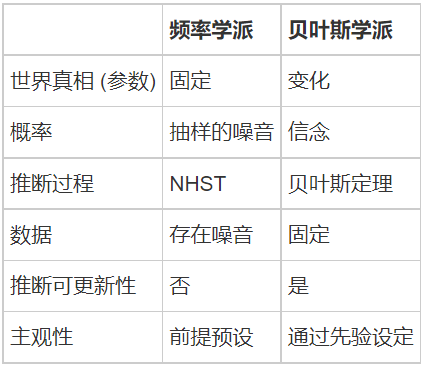



#### 贝叶斯的主观性

#### 任何统计分析方法都不可能完全客观，因此主观性是一个相对概念:

1. 贝叶斯学派的主观性通过先验的设定来体现，透明，不易让人产生误解

2. 频率学派的主观性暗含在各种前提预设中，比如方差分析中的方差齐性和正态性，这种看似‘客观的’预设，一方面难以满足，一方面也是一种主观的设定。

3. 更为宏观的来说，样本的抽取，数据清理方式的选择，分析方法的选择，p值的设定，这些都存在主观性。因此，频率学派并没有想象的那么‘客观’。

4. 主观不一定是坏事：通过量化方法将个体的经验和专家知识整合到数据分析之中。


#### 重复抽样的不同作用


#### 频率学派
1. 统计推断依赖于参数的抽样分布，即只要无限(long-run)的进行抽样，样本分布的参数就会有某种分布形式；

2. NHST中的p值和置信区间的解读均依赖于“无限次抽样”的预设；

3. 实际操作中，我们往往只会收集一次数据，并不会反复的进行抽样；有些情境中，预设“无限次重复抽样并不合理；


#### 贝叶斯学派
1. 假定参数本身是分布，不确定性一起存在于推断之中；

2. 直接根据数据对先验信念进行更新；


#### 置信区间(confidence interval) vs 可信区间(credible interval)

#### No free lunch: 各有优势和缺陷

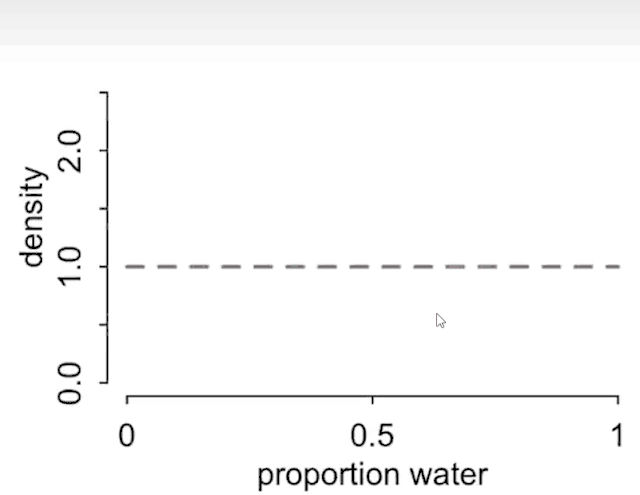
https://cdn.kesci.com/upload/image/rhqd6akbc6.gif?imageView2/0/w/640/h/640


#### NHST的"弱项"

1. 无法直接对零假设(null hypothesis)进行支持，即如果两个总体没有显著差异，他们的相似程度有多少？

2. 一次性只能对比两个总体的假设进行比较；

3. 控制假阳性是一个棘手的问题